## Homework 10

In this homework, you are going to use the code from ```TrafficSignsClassification``` notebook and create your own traffic sign classifier.

In [10]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

### Step 1

Use the data from ```data/subset_homework``` folder and visualize some examples. How many images are there for each class?

In [ ]:
folder = 'data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

In [ ]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [5]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


### Step 2

Run the training with one single neuron (as we did in the lecture). What accuracy can you achieve?

In [8]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [11]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.05712628364562988


In [ ]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [38]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [39]:
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [41]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3029
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2343
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1921
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1620
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1429
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1284
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1197
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1041
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1001


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

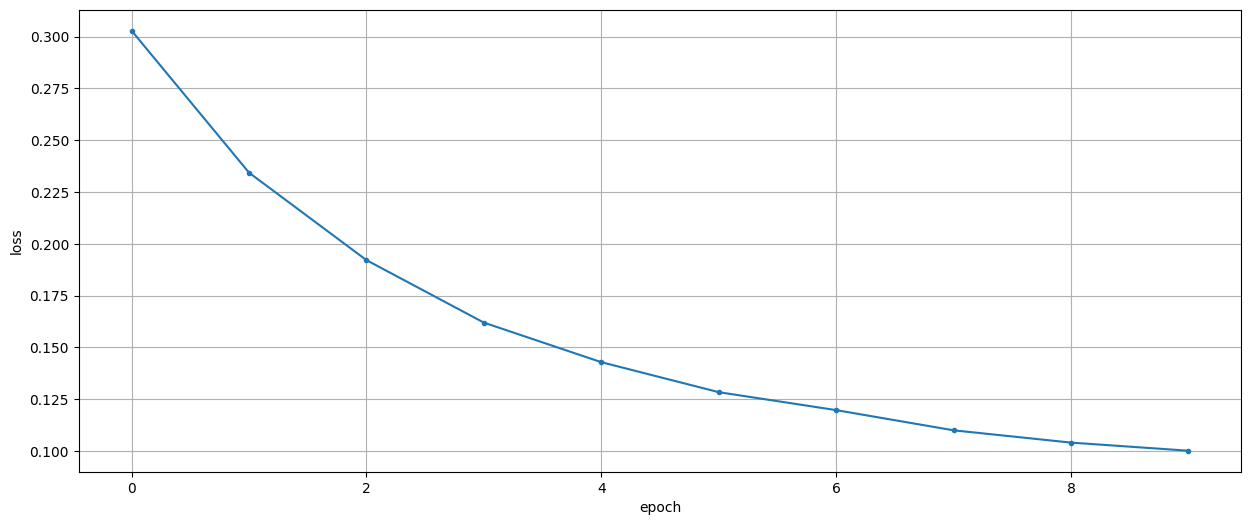

In [42]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

In [43]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [44]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.8865771812080537


Accuracy on the training data is 88%. It means that our model has too low number of parameters to accurately capture all image features. High bias. But still model performance is amazing given that it consists of one perceptron!

In [ ]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

### Step 3

Make further modifications to improve the accuracy (e.g. add more neurons, more layers, etc.). What is the maximum accuracy you can achieve?

In [52]:
from tensorflow.keras import Sequential

model = Sequential([Input(shape=(pixels.shape[1],)), Dense(4, activation='relu'), Dense(1, activation="linear")])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,145 (12.29 KB)

 Trainable params: 3,145 (12.29 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [54]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10


2025-10-13 21:20:52.297110: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_83', 4 bytes spill stores, 4 bytes spill loads



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.2827
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2005
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1600
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1332
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1161
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1068
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0974
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0922
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0871
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0807


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

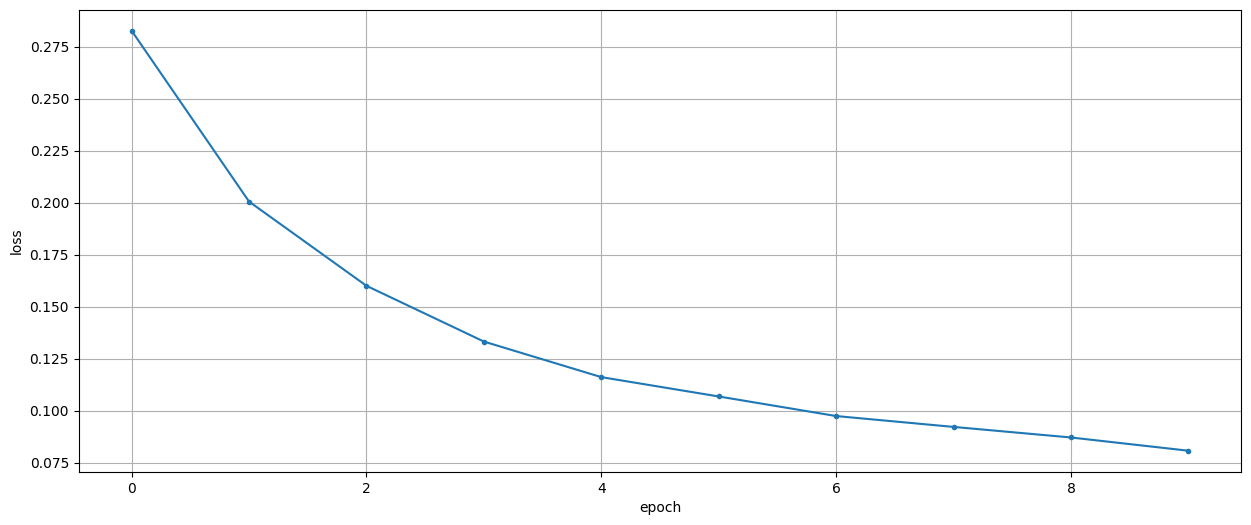

In [55]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

In [56]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [57]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9389261744966443


I managed to achieve accuracy of almost 94% with 2-layer NN.